In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

movies_df = pd.read_csv(r'C:\Users\Admin\Desktop\Github Projects\data\raw\movies_metadata.csv', low_memory= False)

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'],errors='coerce') # Convert data type of release_date to datetime.
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce') # Convert data type of budget to numeric.
movies_df['imdb_id'] = pd.to_numeric(movies_df['imdb_id'], errors='coerce') # Convert data type of imdb_id to numeric.
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce') # Convert data type of id to numeric.

def list_name(string_list_dict): # Convert the string list of dictionary into list of name.
    list_dict = ast.literal_eval(string_list_dict) if pd.notna(string_list_dict) else string_list_dict
    return [dict['name'] for dict in list_dict] if isinstance(list_dict,list) else []

movies_df['genres'] = movies_df['genres'].apply(lambda x: list_name(x))
movies_df['production_companies'] = movies_df['production_companies'].apply(lambda x: list_name(x))
movies_df['production_countries'] = movies_df['production_countries'].apply(lambda x: list_name(x))
movies_df = movies_df.dropna(subset= 'title', axis= 'index')

# What genres tend to receive the highest average ratings?

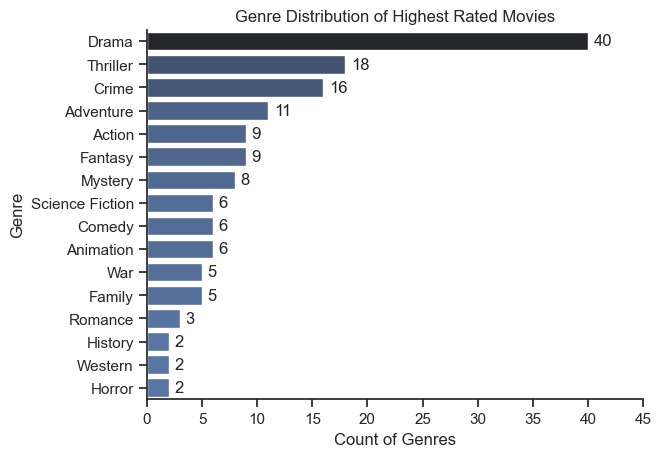

In [2]:
hights_rating_movies = movies_df[(movies_df['vote_count'] > 1000) & (movies_df['vote_average'] >= 8.0)][['title','genres','vote_count','vote_average']]

sns.set_theme(style= 'ticks')
genres_count = hights_rating_movies.explode('genres')['genres'].value_counts().reset_index()
sns.barplot(
    data= genres_count
    ,x= 'count'
    ,y= 'genres'
    ,hue= 'count'
    ,palette= 'dark:b_r'
    ,legend= False
    )

ax= plt.gca()
ax.set_title('Genre Distribution of Highest Rated Movies')
ax.set_xlabel('Count of Genres')
ax.set_ylabel('Genre')
ax.set_xlim(0,45)
ax.spines[['top','right']].set_visible(False)

for i, value in enumerate(genres_count['count']):
    ax.text(
        x= value + 0.5
        ,y= i
        ,s= value
        ,va= 'center'
    )
plt.show()

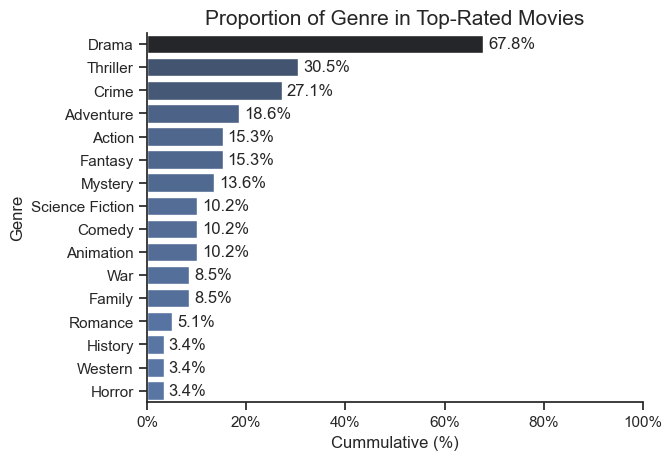

In [4]:
genres_count['perc'] = genres_count['count'] / len(hights_rating_movies) * 100

sns.set_theme(style= 'ticks')
sns.barplot(
    data= genres_count
    ,x= 'perc'
    ,y= 'genres'
    ,hue= 'count'
    ,palette= 'dark:b_r'
    ,legend= False
    )

ax= plt.gca()
ax.set_title('Proportion of Genre in Top-Rated Movies', fontsize= 15)
ax.set_xlabel('Cummulative (%)')
ax.set_ylabel('Genre')
ax.set_xlim(0,100)
ax.spines[['top','right']].set_visible(False)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,i: f'{x:.0f}%'))
for i, value in enumerate(genres_count['perc']):
    ax.text(
        x= value + 1
        ,y= i
        ,s= f'{value:.1f}%'
        ,va= 'center'
    )
plt.show()